In [126]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [127]:
import pandas as pd

In [128]:
import json

In [129]:
import gzip

In [130]:
file_path ='/content/drive/MyDrive/Colab Notebooks/Grocery_and_Gourmet_Food.json.gz'

In [131]:
df = pd.read_json(file_path, compression='gzip', lines=True,nrows=75000)

In [132]:
df.head(3)

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,image,style
0,5,True,"06 4, 2013",ALP49FBWT4I7V,1888861614,Lori,Very pleased with my purchase. Looks exactly l...,Love it,1370304000,NaN,NaN,NaN
1,4,True,"05 23, 2014",A1KPIZOCLB9FZ8,1888861614,BK Shopper,Very nicely crafted but too small. Am going to...,Nice but small,1400803200,NaN,NaN,NaN
2,4,True,"05 9, 2014",A2W0FA06IYAYQE,1888861614,daninethequeen,still very pretty and well made...i am super p...,"the ""s"" looks like a 5, kina",1399593600,NaN,NaN,NaN


In [133]:
df.isnull().sum()

overall               0
verified              0
reviewTime            0
reviewerID            0
asin                  0
reviewerName          8
reviewText           24
summary              14
unixReviewTime        0
vote              63209
image             74256
style             28110
dtype: int64

In [134]:
file_path2 ='/content/drive/MyDrive/Colab Notebooks/meta_Grocery_and_Gourmet_Food.json.gz'

In [135]:
df2 = pd.read_json(file_path2, compression='gzip', lines=True,nrows=75000)

In [136]:
df2.head(2)

,category,tech1,description,fit,title,also_buy,tech2,brand,feature,rank,also_view,main_cat,similar_item,date,price,asin,imageURL,imageURLHighRes,details
0,"[Grocery & Gourmet Food, Dairy, Cheese & Eggs,...",,"[BEEMSTER GOUDA CHEESE AGED 18/24 MONTHS, Stat...",,Beemster Gouda - Aged 18/24 Months - App. 1.5 Lbs,[],,Ariola Imports,[],"165,181 in Grocery & Gourmet Food (","[B0000D9MYM, B0000D9MYL, B00ADHIGBA, B00H9OX59...",Grocery,,,$41.91,0681727810,[],[],NaN
1,"[Grocery & Gourmet Food, Cooking & Baking, Sug...",,"[Shipped from UK, please allow 10 to 21 busine...",,Trim Healthy Mama Xylitol,"[B01898YHXK, B01BCM6LAC, B00Q4OL47O, B00Q4OL5Q...",,,[],"315,867 in Grocery & Gourmet Food (",[],Grocery,,,,0853347867,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,NaN


In [137]:
df2.isnull().sum()

category            0
tech1               0
description         0
fit                 0
title               0
also_buy            0
tech2               0
brand               0
feature             0
rank                0
also_view           0
main_cat            0
similar_item        0
date                0
price               0
asin                0
imageURL            0
imageURLHighRes     0
details            24
dtype: int64

In [138]:
#applying missing value treatment
df['reviewerName']=df['reviewerName'].fillna(df['reviewerName'].mode()[0])
df['reviewText']=df['reviewText'].fillna(df['reviewText'].mode()[0])
df['summary']=df['summary'].fillna(df['summary'].mode()[0])

In [139]:
df.isnull().sum()

overall               0
verified              0
reviewTime            0
reviewerID            0
asin                  0
reviewerName          0
reviewText            0
summary               0
unixReviewTime        0
vote              63209
image             74256
style             28110
dtype: int64

In [140]:
project_raw_data_reviews = df # Saving data for backup

In [141]:
project_raw_data_reviews2 = df2

In [142]:
# data manipulation in df
df.columns

Index(['overall', 'verified', 'reviewTime', 'reviewerID', 'asin',
       'reviewerName', 'reviewText', 'summary', 'unixReviewTime', 'vote',
       'image', 'style'],
      dtype='object')

In [143]:
#removing unwanted columns
df.drop([ 'vote','image', 'style'],axis=1,inplace=True)

In [144]:
df.head()

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime
0,5,True,"06 4, 2013",ALP49FBWT4I7V,1888861614,Lori,Very pleased with my purchase. Looks exactly l...,Love it,1370304000
1,4,True,"05 23, 2014",A1KPIZOCLB9FZ8,1888861614,BK Shopper,Very nicely crafted but too small. Am going to...,Nice but small,1400803200
2,4,True,"05 9, 2014",A2W0FA06IYAYQE,1888861614,daninethequeen,still very pretty and well made...i am super p...,"the ""s"" looks like a 5, kina",1399593600
3,5,True,"04 20, 2014",A2PTZTCH2QUYBC,1888861614,Tammara,"I got this for our wedding cake, and it was ev...",Would recommend this to a friend!,1397952000
4,4,True,"04 16, 2014",A2VNHGJ59N4Z90,1888861614,LaQuinta Alexander,It was just what I want to put at the top of m...,Topper,1397606400


In [145]:
df2.columns

Index(['category', 'tech1', 'description', 'fit', 'title', 'also_buy', 'tech2',
       'brand', 'feature', 'rank', 'also_view', 'main_cat', 'similar_item',
       'date', 'price', 'asin', 'imageURL', 'imageURLHighRes', 'details'],
      dtype='object')

In [146]:
df2.head(2)

,category,tech1,description,fit,title,also_buy,tech2,brand,feature,rank,also_view,main_cat,similar_item,date,price,asin,imageURL,imageURLHighRes,details
0,"[Grocery & Gourmet Food, Dairy, Cheese & Eggs,...",,"[BEEMSTER GOUDA CHEESE AGED 18/24 MONTHS, Stat...",,Beemster Gouda - Aged 18/24 Months - App. 1.5 Lbs,[],,Ariola Imports,[],"165,181 in Grocery & Gourmet Food (","[B0000D9MYM, B0000D9MYL, B00ADHIGBA, B00H9OX59...",Grocery,,,$41.91,0681727810,[],[],NaN
1,"[Grocery & Gourmet Food, Cooking & Baking, Sug...",,"[Shipped from UK, please allow 10 to 21 busine...",,Trim Healthy Mama Xylitol,"[B01898YHXK, B01BCM6LAC, B00Q4OL47O, B00Q4OL5Q...",,,[],"315,867 in Grocery & Gourmet Food (",[],Grocery,,,,0853347867,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,NaN


In [147]:
df2.drop(['imageURL', 'imageURLHighRes', 'details'],axis=1,inplace=True)

In [148]:
df2.head(2)   # Checking after deleting colmns

,category,tech1,description,fit,title,also_buy,tech2,brand,feature,rank,also_view,main_cat,similar_item,date,price,asin
0,"[Grocery & Gourmet Food, Dairy, Cheese & Eggs,...",,"[BEEMSTER GOUDA CHEESE AGED 18/24 MONTHS, Stat...",,Beemster Gouda - Aged 18/24 Months - App. 1.5 Lbs,[],,Ariola Imports,[],"165,181 in Grocery & Gourmet Food (","[B0000D9MYM, B0000D9MYL, B00ADHIGBA, B00H9OX59...",Grocery,,,$41.91,0681727810
1,"[Grocery & Gourmet Food, Cooking & Baking, Sug...",,"[Shipped from UK, please allow 10 to 21 busine...",,Trim Healthy Mama Xylitol,"[B01898YHXK, B01BCM6LAC, B00Q4OL47O, B00Q4OL5Q...",,,[],"315,867 in Grocery & Gourmet Food (",[],Grocery,,,,0853347867


In [149]:
df.head()

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime
0,5,True,"06 4, 2013",ALP49FBWT4I7V,1888861614,Lori,Very pleased with my purchase. Looks exactly l...,Love it,1370304000
1,4,True,"05 23, 2014",A1KPIZOCLB9FZ8,1888861614,BK Shopper,Very nicely crafted but too small. Am going to...,Nice but small,1400803200
2,4,True,"05 9, 2014",A2W0FA06IYAYQE,1888861614,daninethequeen,still very pretty and well made...i am super p...,"the ""s"" looks like a 5, kina",1399593600
3,5,True,"04 20, 2014",A2PTZTCH2QUYBC,1888861614,Tammara,"I got this for our wedding cake, and it was ev...",Would recommend this to a friend!,1397952000
4,4,True,"04 16, 2014",A2VNHGJ59N4Z90,1888861614,LaQuinta Alexander,It was just what I want to put at the top of m...,Topper,1397606400


In [150]:
# df data looks Clean and doesnt need Cleaning

In [151]:
# merging two files
merged=pd.merge(df,df2,on='asin',how='inner')  # merging the two dataframes with common column = asin and joining type =inner
merged.head(1) # reading the first record of merged dataframe

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,category,...,also_buy,tech2,brand,feature,rank,also_view,main_cat,similar_item,date,price
0,5,True,"06 4, 2013",ALP49FBWT4I7V,1888861614,Lori,Very pleased with my purchase. Looks exactly l...,Love it,1370304000,"[Grocery & Gourmet Food, Cooking & Baking, Fro...",...,[],,Unik Occasions,"[4.75"" height]","[>#590,999 in Kitchen & Dining (See Top 100 in...",[],Amazon Home,,"September 11, 2011",$15.00


In [152]:
# downloading the Merged Data into Local Machine
merged.to_csv("capstoneproject.csv", index=False, escapechar='\\')

In [153]:
dlf=pd.read_csv(r'/content/capstoneproject.csv')   # load and reading the data
dlf

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,category,...,also_buy,tech2,brand,feature,rank,also_view,main_cat,similar_item,date,price
0,5,True,"06 4, 2013",ALP49FBWT4I7V,1888861614,Lori,Very pleased with my purchase. Looks exactly l...,Love it,1370304000,"['Grocery & Gourmet Food', 'Cooking & Baking',...",...,[],NaN,Unik Occasions,"['4.75"" height']","['>#590,999 in Kitchen & Dining (See Top 100 i...",[],Amazon Home,NaN,"September 11, 2011",$15.00
1,4,True,"05 23, 2014",A1KPIZOCLB9FZ8,1888861614,BK Shopper,Very nicely crafted but too small. Am going to...,Nice but small,1400803200,"['Grocery & Gourmet Food', 'Cooking & Baking',...",...,[],NaN,Unik Occasions,"['4.75"" height']","['>#590,999 in Kitchen & Dining (See Top 100 i...",[],Amazon Home,NaN,"September 11, 2011",$15.00
2,4,True,"05 9, 2014",A2W0FA06IYAYQE,1888861614,daninethequeen,still very pretty and well made...i am super p...,"the ""s"" looks like a 5, kina",1399593600,"['Grocery & Gourmet Food', 'Cooking & Baking',...",...,[],NaN,Unik Occasions,"['4.75"" height']","['>#590,999 in Kitchen & Dining (See Top 100 i...",[],Amazon Home,NaN,"September 11, 2011",$15.00
3,5,True,"04 20, 2014",A2PTZTCH2QUYBC,1888861614,Tammara,"I got this for our wedding cake, and it was ev...",Would recommend this to a friend!,1397952000,"['Grocery & Gourmet Food', 'Cooking & Baking',...",...,[],NaN,Unik Occasions,"['4.75"" height']","['>#590,999 in Kitchen & Dining (See Top 100 i...",[],Amazon Home,NaN,"September 11, 2011",$15.00
4,4,True,"04 16, 2014",A2VNHGJ59N4Z90,1888861614,LaQuinta Alexander,It was just what I want to put at the top of m...,Topper,1397606400,"['Grocery & Gourmet Food', 'Cooking & Baking',...",...,[],NaN,Unik Occasions,"['4.75"" height']","['>#590,999 in Kitchen & Dining (See Top 100 i...",[],Amazon Home,NaN,"September 11, 2011",$15.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149372,5,True,"02 16, 2017",AO4W7E69Y6ZLO,B0002AUTN6,Tish,This is my favorite tea thus far!,Five Stars,1487203200,"['Grocery & Gourmet Food', 'Beverages', 'Coffe...",...,"['B001EXNG08', 'B0024SEA6Q', 'B001EXNA2W', 'B0...",NaN,The Republic of Tea,[],"26,674 in Grocery & Gourmet Food (","['B0015YSKRA', 'B0024SEA6Q', 'B0002AUTKE', 'B0...",Grocery,NaN,NaN,NaN
149373,5,True,"02 16, 2017",AS8U5GDO64NL8,B0002AUTN6,JoAnn,This is great as an iced tea- great flavor and...,Five Stars,1487203200,"['Grocery & Gourmet Food', 'Beverages', 'Coffe...",...,"['B001EXNG08', 'B0024SEA6Q', 'B001EXNA2W', 'B0...",NaN,The Republic of Tea,[],"26,674 in Grocery & Gourmet Food (","['B0015YSKRA', 'B0024SEA6Q', 'B0002AUTKE', 'B0...",Grocery,NaN,NaN,NaN
149374,5,True,"02 16, 2017",AS8U5GDO64NL8,B0002AUTN6,JoAnn,This is great as an iced tea- great flavor and...,Five Stars,1487203200,"['Grocery & Gourmet Food', 'Beverages', 'Coffe...",...,"['B001EXNG08', 'B0024SEA6Q', 'B001EXNA2W', 'B0...",NaN,The Republic of Tea,[],"26,674 in Grocery & Gourmet Food (","['B0015YSKRA', 'B0024SEA6Q', 'B0002AUTKE', 'B0...",Grocery,NaN,NaN,NaN
149375,5,True,"02 15, 2017",A67PFFIAYQUNC,B0002AUTN6,cynthia lynn abbott,This product was mentioned as a top pick in a ...,a nice cinnamon hint with a bit of sweetness f...,1487116800,"['Grocery & Gourmet Food', 'Beverages', 'Coffe...",...,"['B001EXNG08', 'B0024SEA6Q', 'B001EXNA2W', 'B0...",NaN,The Republic of Tea,[],"26,674 in Grocery & Gourmet Food (","['B0015YSKRA', 'B0024SEA6Q', 'B0002AUTKE', 'B0...",Grocery,NaN,NaN,NaN


In [154]:
# Text Preprocessing

In [155]:
import re         # regular expression for string manipulation

import nltk       # Natural Language Toolkit (nltk) library

nltk.download('punkt')     # download the required 'punkt'  module.
# punkt needed for various text processing tasks such as tokenization, sentence splitting, and word stemming.

nltk.download('stopwords')   # download the required 'stopwords' module

from nltk.corpus import stopwords    # imports the stopwords module from the nltk corpus

def cleaning(text):        # given input as text in function

    # uses regular expressions to replace all characters that are not letters, spaces, hyphens, or digits from the input string with space
    text = re.sub("[^0-9A-Za-z\-\_ ]+", " ", text)
    # replace all numbers except those attached to a word with space
    text = re.sub("(?<!\w)\d+\_", "", text)
    # replace all hyphens except between two words with space
    text = re.sub("-(?!\w)|(?<!\w)-", "", text)
    # converts all the characters in the input string to lowercase.
    text = text.lower()
    # Remove stopwords
    stop_words = set(stopwords.words('english')) #  set of English stopwords is created from the stopwords module imported earlier.
    words = nltk.word_tokenize(text)   # input string is tokenized into individual words using the word_tokenize function from the nltk library
    words = [word for word in words if not word in stop_words]   # the words in words variable not in stop_words variable are saved in to word variable
    text = " ".join(words)    # joining all the words without stopwords to form an corpus
    return text              # returns the final text output

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [156]:
new1=dlf['reviewText'].apply(cleaning)  # Applying the above cleaning function on specific column ( reviewText) in dlf dataframe
                                        # and saving the reviewText into an new variable
new1

0         pleased purchase looks exactly like picture lo...
1         nicely crafted small going add flowers somethi...
2         still pretty well made super picky listen whis...
3         got wedding cake everything even person would ...
4               want put top wedding cake love true picture
                                ...                        
149372                                favorite tea thus far
149373     great iced tea great flavor even need sweeteners
149374     great iced tea great flavor even need sweeteners
149375    product mentioned top pick food beverage blog ...
149376    product mentioned top pick food beverage blog ...
Name: reviewText, Length: 149377, dtype: object

In [157]:
dlf['new_reviewtext']=new1    # now adding the new1 dataframe which is having cleaned reviewtext to dlf with new columnn name (new_reviewText)
dlf.head()

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,category,...,tech2,brand,feature,rank,also_view,main_cat,similar_item,date,price,new_reviewtext
0,5,True,"06 4, 2013",ALP49FBWT4I7V,1888861614,Lori,Very pleased with my purchase. Looks exactly l...,Love it,1370304000,"['Grocery & Gourmet Food', 'Cooking & Baking',...",...,NaN,Unik Occasions,"['4.75"" height']","['>#590,999 in Kitchen & Dining (See Top 100 i...",[],Amazon Home,NaN,"September 11, 2011",$15.00,pleased purchase looks exactly like picture lo...
1,4,True,"05 23, 2014",A1KPIZOCLB9FZ8,1888861614,BK Shopper,Very nicely crafted but too small. Am going to...,Nice but small,1400803200,"['Grocery & Gourmet Food', 'Cooking & Baking',...",...,NaN,Unik Occasions,"['4.75"" height']","['>#590,999 in Kitchen & Dining (See Top 100 i...",[],Amazon Home,NaN,"September 11, 2011",$15.00,nicely crafted small going add flowers somethi...
2,4,True,"05 9, 2014",A2W0FA06IYAYQE,1888861614,daninethequeen,still very pretty and well made...i am super p...,"the ""s"" looks like a 5, kina",1399593600,"['Grocery & Gourmet Food', 'Cooking & Baking',...",...,NaN,Unik Occasions,"['4.75"" height']","['>#590,999 in Kitchen & Dining (See Top 100 i...",[],Amazon Home,NaN,"September 11, 2011",$15.00,still pretty well made super picky listen whis...
3,5,True,"04 20, 2014",A2PTZTCH2QUYBC,1888861614,Tammara,"I got this for our wedding cake, and it was ev...",Would recommend this to a friend!,1397952000,"['Grocery & Gourmet Food', 'Cooking & Baking',...",...,NaN,Unik Occasions,"['4.75"" height']","['>#590,999 in Kitchen & Dining (See Top 100 i...",[],Amazon Home,NaN,"September 11, 2011",$15.00,got wedding cake everything even person would ...
4,4,True,"04 16, 2014",A2VNHGJ59N4Z90,1888861614,LaQuinta Alexander,It was just what I want to put at the top of m...,Topper,1397606400,"['Grocery & Gourmet Food', 'Cooking & Baking',...",...,NaN,Unik Occasions,"['4.75"" height']","['>#590,999 in Kitchen & Dining (See Top 100 i...",[],Amazon Home,NaN,"September 11, 2011",$15.00,want put top wedding cake love true picture


In [158]:
# creating an sentiment column based on condition over overall columns through a function

def categorize(dlf):

    if dlf['overall'] == 3:   # if overall value is 3 then its neutral
        result = 'Neutral'

    elif dlf['overall'] > 3:   # if overall value is more than 3 its postive
        result = 'Positive'

    elif dlf['overall'] < 3:   # if overall value is less than 3 its negative
        result = 'Negative'

    return result

In [159]:
dlf['Sentiment'] = dlf.apply(categorize, axis=1)

In [160]:
dlf.head()

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,category,...,brand,feature,rank,also_view,main_cat,similar_item,date,price,new_reviewtext,Sentiment
0,5,True,"06 4, 2013",ALP49FBWT4I7V,1888861614,Lori,Very pleased with my purchase. Looks exactly l...,Love it,1370304000,"['Grocery & Gourmet Food', 'Cooking & Baking',...",...,Unik Occasions,"['4.75"" height']","['>#590,999 in Kitchen & Dining (See Top 100 i...",[],Amazon Home,NaN,"September 11, 2011",$15.00,pleased purchase looks exactly like picture lo...,Positive
1,4,True,"05 23, 2014",A1KPIZOCLB9FZ8,1888861614,BK Shopper,Very nicely crafted but too small. Am going to...,Nice but small,1400803200,"['Grocery & Gourmet Food', 'Cooking & Baking',...",...,Unik Occasions,"['4.75"" height']","['>#590,999 in Kitchen & Dining (See Top 100 i...",[],Amazon Home,NaN,"September 11, 2011",$15.00,nicely crafted small going add flowers somethi...,Positive
2,4,True,"05 9, 2014",A2W0FA06IYAYQE,1888861614,daninethequeen,still very pretty and well made...i am super p...,"the ""s"" looks like a 5, kina",1399593600,"['Grocery & Gourmet Food', 'Cooking & Baking',...",...,Unik Occasions,"['4.75"" height']","['>#590,999 in Kitchen & Dining (See Top 100 i...",[],Amazon Home,NaN,"September 11, 2011",$15.00,still pretty well made super picky listen whis...,Positive
3,5,True,"04 20, 2014",A2PTZTCH2QUYBC,1888861614,Tammara,"I got this for our wedding cake, and it was ev...",Would recommend this to a friend!,1397952000,"['Grocery & Gourmet Food', 'Cooking & Baking',...",...,Unik Occasions,"['4.75"" height']","['>#590,999 in Kitchen & Dining (See Top 100 i...",[],Amazon Home,NaN,"September 11, 2011",$15.00,got wedding cake everything even person would ...,Positive
4,4,True,"04 16, 2014",A2VNHGJ59N4Z90,1888861614,LaQuinta Alexander,It was just what I want to put at the top of m...,Topper,1397606400,"['Grocery & Gourmet Food', 'Cooking & Baking',...",...,Unik Occasions,"['4.75"" height']","['>#590,999 in Kitchen & Dining (See Top 100 i...",[],Amazon Home,NaN,"September 11, 2011",$15.00,want put top wedding cake love true picture,Positive


In [161]:
dlf.to_csv("Amazonproject.csv", index=False, escapechar='\\')

In [162]:
from sklearn.preprocessing import LabelEncoder  # converting the records from categorical to numerical values

In [163]:
encod = LabelEncoder()

In [164]:
# dlf['Sentiment']=encod.fit_transform(dlf['Sentiment'])

In [165]:
dlf.columns

Index(['overall', 'verified', 'reviewTime', 'reviewerID', 'asin',
       'reviewerName', 'reviewText', 'summary', 'unixReviewTime', 'category',
       'tech1', 'description', 'fit', 'title', 'also_buy', 'tech2', 'brand',
       'feature', 'rank', 'also_view', 'main_cat', 'similar_item', 'date',
       'price', 'new_reviewtext', 'Sentiment'],
      dtype='object')

In [166]:
new_dlf=dlf.drop(['overall', 'verified', 'reviewTime', 'reviewerID', 'asin',
       'reviewerName', 'reviewText', 'summary', 'unixReviewTime', 'category',
       'tech1', 'description', 'fit', 'title', 'also_buy', 'tech2', 'brand',
       'feature', 'rank', 'also_view', 'main_cat', 'similar_item', 'date',
       'price'],axis=1)
new_dlf.tail()

,new_reviewtext,Sentiment
149372,favorite tea thus far,Positive
149373,great iced tea great flavor even need sweeteners,Positive
149374,great iced tea great flavor even need sweeteners,Positive
149375,product mentioned top pick food beverage blog ...,Positive
149376,product mentioned top pick food beverage blog ...,Positive


In [167]:
# creating an new dataframe new_dlf and creating a column (summary) and saving the summary data into it from dlf
new_dlf['Summary']=dlf['summary']

In [168]:
new_dlf['Sentiment'].value_counts()   # checking the count of each class in the object of sentiment from new_dlf dataframe

Positive    127295
Negative     14208
Neutral       7874
Name: Sentiment, dtype: int64

In [169]:
corpus = []    # a empty list to save the corpus ( text document)
for i in range(0, len(dlf)):    # iterations from 0 to length of dlf dataframe
    # extracting the value at row i and column 'new_reviewtext'
    review = dlf.loc[i, 'new_reviewtext']  # Extract the review text from the DataFrame
    review = re.sub('\s+', ' ', review)  # Replace multiple spaces with a single space
    review = cleaning(review)  # Apply the cleaning function
    corpus.append(review)

In [170]:
corpus       # cleaned text document in list

['pleased purchase looks exactly like picture look great cake definitely sparkle',
 'nicely crafted small going add flowers something compensate size',
 'still pretty well made super picky listen whispers look like number 5',
 'got wedding cake everything even person would recommend anyone',
 'want put top wedding cake love true picture',
 'beautiful however upon checkout informed would saturday latest wedding sunday come monday wedding',
 'omg inexpensive exactly wanted searched everywhere one best one',
 'nice size cake topper sparkley purchase products future source',
 'perfect wait use wedding cake november good quality right bling',
 'exactly looking make cake sparkle along strands diamonds already cake',
 'arrived mail packaged well break pretty well worth money wait use wedding cake',
 'adverse comment',
 'hard find locally amazon good price first tasted tea costa rica loved',
 'best black tea us highly recommend use 3 bags large 16 oz glass mug boiled water add boiled milk suga

In [171]:
# term frequency-inverse document frequency
# TfidfVectorizer is typically used to extract features from a collection of text documents for machine learning models.
from sklearn.feature_extraction.text import TfidfVectorizer # converting text data into a numerical feature matrix.

In [172]:
tfidfv = TfidfVectorizer()   # assigning tfidfvectotizer to an varaible

In [173]:
# X and y are the input and output data, that can be used to train and evaluate machine learning models for sentiment analysis.

X = tfidfv.fit_transform(corpus)
y = new_dlf[['Sentiment']].values

In [174]:
y       # sentiment column as Y

array([['Positive'],
       ['Positive'],
       ['Positive'],
       ...,
       ['Positive'],
       ['Positive'],
       ['Positive']], dtype=object)

In [175]:
import numpy as np # creating and manipulating arrays

(unique, counts) = np.unique(y, return_counts=True)
"""here using np.unique and return_counts we are finding the unique values and
and storing them in unique and also count of unique values in counts"""
frequencies = np.asarray((unique, counts)).T   #  creating an varaible and applying array on unique and counts to display each unique value countS

print(frequencies)

# 0 is Negative
# 1 is Neutral
# 2 is Positive

[['Negative' 14208]
 ['Neutral' 7874]
 ['Positive' 127295]]


In [176]:
dlf_text=dlf['new_reviewtext']    # saving the new_reviewText seperately into an new variable from dlf to dlf_text
dlf_text

0         pleased purchase looks exactly like picture lo...
1         nicely crafted small going add flowers somethi...
2         still pretty well made super picky listen whis...
3         got wedding cake everything even person would ...
4               want put top wedding cake love true picture
                                ...                        
149372                                favorite tea thus far
149373     great iced tea great flavor even need sweeteners
149374     great iced tea great flavor even need sweeteners
149375    product mentioned top pick food beverage blog ...
149376    product mentioned top pick food beverage blog ...
Name: new_reviewtext, Length: 149377, dtype: object

In [177]:
import nltk #  # Natural Language Toolkit (nltk) library

In [178]:
# sentiment analysis tool
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [179]:
from nltk.sentiment import SentimentIntensityAnalyzer   # its is a class in vader
sia = SentimentIntensityAnalyzer()      # caling in an variable

In [180]:
from tqdm.notebook import tqdm # library to add a progress bar to the loop that iterates over the rows of the dlf dataframe.


res = []   # an empty list
for i, row in tqdm(dlf.iterrows(), total=len(dlf)):   # bar staring from iterrows o to len of dlf
    text = row['new_reviewtext']          # this will iterate each row of new_reviewText and store in text variable
    res.append(sia.polarity_scores(text))    # applying  polarity_scores method of SentimentIntensityAnalyzer on text
    # then storing the scores of pos,neg,neu,compound in to the res
    # overall sentiment score ranging from -1 to 1

  0%|          | 0/149377 [00:00<?, ?it/s]

In [181]:
dlf_copy=dlf    # taking a copy of the original dataframe

In [182]:
score=pd.DataFrame(res)      # converting the res variable to dataframe and storing it into new variable score
score

,neg,neu,pos,compound
0,0.0,0.286,0.714,0.9325
1,0.0,0.734,0.266,0.4404
2,0.0,0.316,0.684,0.9001
3,0.0,0.762,0.238,0.3612
4,0.0,0.284,0.716,0.8442
...,...,...,...,...
149372,0.0,0.500,0.500,0.4588
149373,0.0,0.423,0.577,0.8481
149374,0.0,0.423,0.577,0.8481
149375,0.0,0.544,0.456,0.9803


In [183]:
# combining the original dataframe dlf and score dataframe and storing it into an new variable dataframe
df_merged = pd.concat([dlf_copy, score], ignore_index=False,axis=1)
df_merged

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,category,...,main_cat,similar_item,date,price,new_reviewtext,Sentiment,neg,neu,pos,compound
0,5,True,"06 4, 2013",ALP49FBWT4I7V,1888861614,Lori,Very pleased with my purchase. Looks exactly l...,Love it,1370304000,"['Grocery & Gourmet Food', 'Cooking & Baking',...",...,Amazon Home,NaN,"September 11, 2011",$15.00,pleased purchase looks exactly like picture lo...,Positive,0.0,0.286,0.714,0.9325
1,4,True,"05 23, 2014",A1KPIZOCLB9FZ8,1888861614,BK Shopper,Very nicely crafted but too small. Am going to...,Nice but small,1400803200,"['Grocery & Gourmet Food', 'Cooking & Baking',...",...,Amazon Home,NaN,"September 11, 2011",$15.00,nicely crafted small going add flowers somethi...,Positive,0.0,0.734,0.266,0.4404
2,4,True,"05 9, 2014",A2W0FA06IYAYQE,1888861614,daninethequeen,still very pretty and well made...i am super p...,"the ""s"" looks like a 5, kina",1399593600,"['Grocery & Gourmet Food', 'Cooking & Baking',...",...,Amazon Home,NaN,"September 11, 2011",$15.00,still pretty well made super picky listen whis...,Positive,0.0,0.316,0.684,0.9001
3,5,True,"04 20, 2014",A2PTZTCH2QUYBC,1888861614,Tammara,"I got this for our wedding cake, and it was ev...",Would recommend this to a friend!,1397952000,"['Grocery & Gourmet Food', 'Cooking & Baking',...",...,Amazon Home,NaN,"September 11, 2011",$15.00,got wedding cake everything even person would ...,Positive,0.0,0.762,0.238,0.3612
4,4,True,"04 16, 2014",A2VNHGJ59N4Z90,1888861614,LaQuinta Alexander,It was just what I want to put at the top of m...,Topper,1397606400,"['Grocery & Gourmet Food', 'Cooking & Baking',...",...,Amazon Home,NaN,"September 11, 2011",$15.00,want put top wedding cake love true picture,Positive,0.0,0.284,0.716,0.8442
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149372,5,True,"02 16, 2017",AO4W7E69Y6ZLO,B0002AUTN6,Tish,This is my favorite tea thus far!,Five Stars,1487203200,"['Grocery & Gourmet Food', 'Beverages', 'Coffe...",...,Grocery,NaN,NaN,NaN,favorite tea thus far,Positive,0.0,0.500,0.500,0.4588
149373,5,True,"02 16, 2017",AS8U5GDO64NL8,B0002AUTN6,JoAnn,This is great as an iced tea- great flavor and...,Five Stars,1487203200,"['Grocery & Gourmet Food', 'Beverages', 'Coffe...",...,Grocery,NaN,NaN,NaN,great iced tea great flavor even need sweeteners,Positive,0.0,0.423,0.577,0.8481
149374,5,True,"02 16, 2017",AS8U5GDO64NL8,B0002AUTN6,JoAnn,This is great as an iced tea- great flavor and...,Five Stars,1487203200,"['Grocery & Gourmet Food', 'Beverages', 'Coffe...",...,Grocery,NaN,NaN,NaN,great iced tea great flavor even need sweeteners,Positive,0.0,0.423,0.577,0.8481
149375,5,True,"02 15, 2017",A67PFFIAYQUNC,B0002AUTN6,cynthia lynn abbott,This product was mentioned as a top pick in a ...,a nice cinnamon hint with a bit of sweetness f...,1487116800,"['Grocery & Gourmet Food', 'Beverages', 'Coffe...",...,Grocery,NaN,NaN,NaN,product mentioned top pick food beverage blog ...,Positive,0.0,0.544,0.456,0.9803


In [184]:
df_merged.to_csv("Amazonprojectanalysis.csv", index=False, escapechar='\\')

In [185]:
df_merged.head(2)

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,category,...,main_cat,similar_item,date,price,new_reviewtext,Sentiment,neg,neu,pos,compound
0,5,True,"06 4, 2013",ALP49FBWT4I7V,1888861614,Lori,Very pleased with my purchase. Looks exactly l...,Love it,1370304000,"['Grocery & Gourmet Food', 'Cooking & Baking',...",...,Amazon Home,NaN,"September 11, 2011",$15.00,pleased purchase looks exactly like picture lo...,Positive,0.0,0.286,0.714,0.9325
1,4,True,"05 23, 2014",A1KPIZOCLB9FZ8,1888861614,BK Shopper,Very nicely crafted but too small. Am going to...,Nice but small,1400803200,"['Grocery & Gourmet Food', 'Cooking & Baking',...",...,Amazon Home,NaN,"September 11, 2011",$15.00,nicely crafted small going add flowers somethi...,Positive,0.0,0.734,0.266,0.4404


In [186]:
df_merged[['Category1', 'sub category','items']] = df_merged['category'].str.split(',',2, expand=True)

In [187]:
df_merged.head()

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,category,...,price,new_reviewtext,Sentiment,neg,neu,pos,compound,Category1,sub category,items
0,5,True,"06 4, 2013",ALP49FBWT4I7V,1888861614,Lori,Very pleased with my purchase. Looks exactly l...,Love it,1370304000,"['Grocery & Gourmet Food', 'Cooking & Baking',...",...,$15.00,pleased purchase looks exactly like picture lo...,Positive,0.0,0.286,0.714,0.9325,['Grocery & Gourmet Food','Cooking & Baking',"'Frosting, Icing & Decorations', 'Cake & Cupc..."
1,4,True,"05 23, 2014",A1KPIZOCLB9FZ8,1888861614,BK Shopper,Very nicely crafted but too small. Am going to...,Nice but small,1400803200,"['Grocery & Gourmet Food', 'Cooking & Baking',...",...,$15.00,nicely crafted small going add flowers somethi...,Positive,0.0,0.734,0.266,0.4404,['Grocery & Gourmet Food','Cooking & Baking',"'Frosting, Icing & Decorations', 'Cake & Cupc..."
2,4,True,"05 9, 2014",A2W0FA06IYAYQE,1888861614,daninethequeen,still very pretty and well made...i am super p...,"the ""s"" looks like a 5, kina",1399593600,"['Grocery & Gourmet Food', 'Cooking & Baking',...",...,$15.00,still pretty well made super picky listen whis...,Positive,0.0,0.316,0.684,0.9001,['Grocery & Gourmet Food','Cooking & Baking',"'Frosting, Icing & Decorations', 'Cake & Cupc..."
3,5,True,"04 20, 2014",A2PTZTCH2QUYBC,1888861614,Tammara,"I got this for our wedding cake, and it was ev...",Would recommend this to a friend!,1397952000,"['Grocery & Gourmet Food', 'Cooking & Baking',...",...,$15.00,got wedding cake everything even person would ...,Positive,0.0,0.762,0.238,0.3612,['Grocery & Gourmet Food','Cooking & Baking',"'Frosting, Icing & Decorations', 'Cake & Cupc..."
4,4,True,"04 16, 2014",A2VNHGJ59N4Z90,1888861614,LaQuinta Alexander,It was just what I want to put at the top of m...,Topper,1397606400,"['Grocery & Gourmet Food', 'Cooking & Baking',...",...,$15.00,want put top wedding cake love true picture,Positive,0.0,0.284,0.716,0.8442,['Grocery & Gourmet Food','Cooking & Baking',"'Frosting, Icing & Decorations', 'Cake & Cupc..."


In [188]:
df_merged['Category1'] = df_merged['Category1'].str.replace(r"[\[\]']",'')
df_merged['sub category'] = df_merged['sub category'].str.replace(r"[\[\]']",'')
df_merged['items'] = df_merged['items'].str.replace(r"[\[\]']",'')

In [189]:
df_merged.head()

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,category,...,price,new_reviewtext,Sentiment,neg,neu,pos,compound,Category1,sub category,items
0,5,True,"06 4, 2013",ALP49FBWT4I7V,1888861614,Lori,Very pleased with my purchase. Looks exactly l...,Love it,1370304000,"['Grocery & Gourmet Food', 'Cooking & Baking',...",...,$15.00,pleased purchase looks exactly like picture lo...,Positive,0.0,0.286,0.714,0.9325,Grocery & Gourmet Food,Cooking & Baking,"Frosting, Icing & Decorations, Cake & Cupcake..."
1,4,True,"05 23, 2014",A1KPIZOCLB9FZ8,1888861614,BK Shopper,Very nicely crafted but too small. Am going to...,Nice but small,1400803200,"['Grocery & Gourmet Food', 'Cooking & Baking',...",...,$15.00,nicely crafted small going add flowers somethi...,Positive,0.0,0.734,0.266,0.4404,Grocery & Gourmet Food,Cooking & Baking,"Frosting, Icing & Decorations, Cake & Cupcake..."
2,4,True,"05 9, 2014",A2W0FA06IYAYQE,1888861614,daninethequeen,still very pretty and well made...i am super p...,"the ""s"" looks like a 5, kina",1399593600,"['Grocery & Gourmet Food', 'Cooking & Baking',...",...,$15.00,still pretty well made super picky listen whis...,Positive,0.0,0.316,0.684,0.9001,Grocery & Gourmet Food,Cooking & Baking,"Frosting, Icing & Decorations, Cake & Cupcake..."
3,5,True,"04 20, 2014",A2PTZTCH2QUYBC,1888861614,Tammara,"I got this for our wedding cake, and it was ev...",Would recommend this to a friend!,1397952000,"['Grocery & Gourmet Food', 'Cooking & Baking',...",...,$15.00,got wedding cake everything even person would ...,Positive,0.0,0.762,0.238,0.3612,Grocery & Gourmet Food,Cooking & Baking,"Frosting, Icing & Decorations, Cake & Cupcake..."
4,4,True,"04 16, 2014",A2VNHGJ59N4Z90,1888861614,LaQuinta Alexander,It was just what I want to put at the top of m...,Topper,1397606400,"['Grocery & Gourmet Food', 'Cooking & Baking',...",...,$15.00,want put top wedding cake love true picture,Positive,0.0,0.284,0.716,0.8442,Grocery & Gourmet Food,Cooking & Baking,"Frosting, Icing & Decorations, Cake & Cupcake..."


In [190]:
# Split the 'DateTime' column into 'Time' and 'Year'
df_merged[['Time', 'Year']] = df_merged['reviewTime'].str.split(',', 1, expand=True)

In [191]:
df_merged.head(3)

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,category,...,Sentiment,neg,neu,pos,compound,Category1,sub category,items,Time,Year
0,5,True,"06 4, 2013",ALP49FBWT4I7V,1888861614,Lori,Very pleased with my purchase. Looks exactly l...,Love it,1370304000,"['Grocery & Gourmet Food', 'Cooking & Baking',...",...,Positive,0.0,0.286,0.714,0.9325,Grocery & Gourmet Food,Cooking & Baking,"Frosting, Icing & Decorations, Cake & Cupcake...",06 4,2013
1,4,True,"05 23, 2014",A1KPIZOCLB9FZ8,1888861614,BK Shopper,Very nicely crafted but too small. Am going to...,Nice but small,1400803200,"['Grocery & Gourmet Food', 'Cooking & Baking',...",...,Positive,0.0,0.734,0.266,0.4404,Grocery & Gourmet Food,Cooking & Baking,"Frosting, Icing & Decorations, Cake & Cupcake...",05 23,2014
2,4,True,"05 9, 2014",A2W0FA06IYAYQE,1888861614,daninethequeen,still very pretty and well made...i am super p...,"the ""s"" looks like a 5, kina",1399593600,"['Grocery & Gourmet Food', 'Cooking & Baking',...",...,Positive,0.0,0.316,0.684,0.9001,Grocery & Gourmet Food,Cooking & Baking,"Frosting, Icing & Decorations, Cake & Cupcake...",05 9,2014


In [192]:
df_merged.columns

Index(['overall', 'verified', 'reviewTime', 'reviewerID', 'asin',
       'reviewerName', 'reviewText', 'summary', 'unixReviewTime', 'category',
       'tech1', 'description', 'fit', 'title', 'also_buy', 'tech2', 'brand',
       'feature', 'rank', 'also_view', 'main_cat', 'similar_item', 'date',
       'price', 'new_reviewtext', 'Sentiment', 'neg', 'neu', 'pos', 'compound',
       'Category1', 'sub category', 'items', 'Time', 'Year'],
      dtype='object')

In [193]:
Final_Amazon_file=df_merged.drop(['reviewTime','category','also_buy','also_view','tech1','tech2','fit','similar_item'],axis=1)
#Deleting unwanted columns in Dataframe

In [194]:
Final_Amazon_file.head(1)

,overall,verified,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,description,title,...,Sentiment,neg,neu,pos,compound,Category1,sub category,items,Time,Year
0,5,True,ALP49FBWT4I7V,1888861614,Lori,Very pleased with my purchase. Looks exactly l...,Love it,1370304000,"['4.75""']",Letter S - Swarovski Crystal Monogram Wedding ...,...,Positive,0.0,0.286,0.714,0.9325,Grocery & Gourmet Food,Cooking & Baking,"Frosting, Icing & Decorations, Cake & Cupcake...",06 4,2013


In [195]:
Final_Amazon_file.to_csv("Amazonprojectdata.csv", index=False, escapechar='\\')

In [196]:
import seaborn as sns  # used for visualization
import matplotlib.pyplot as plt

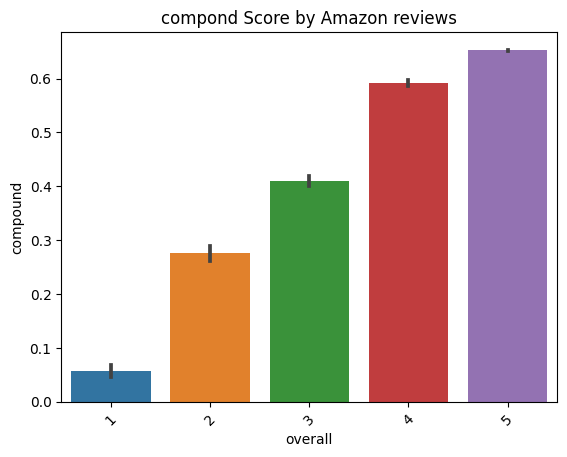

In [197]:
ax=sns.barplot(data=df_merged,x='overall',y='compound')
plt.xticks(rotation=45)
ax.set_title('compond Score by Amazon reviews')
plt.show()

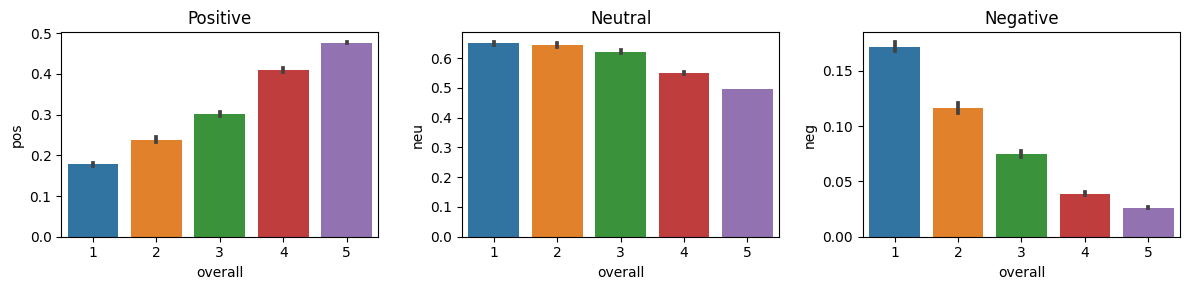

In [198]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))   # assigning number of subplots and size of plot stating 1 row 3 columns
sns.barplot(data=df_merged, x='overall', y='pos', ax=axs[0]) # 1st column shows positive score of each class in overall
sns.barplot(data=df_merged, x='overall', y='neu', ax=axs[1]) # 2nd column shows Neutral score of each class in overall
sns.barplot(data=df_merged, x='overall', y='neg', ax=axs[2]) # 3rd column shows Negative score of each class in overall
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

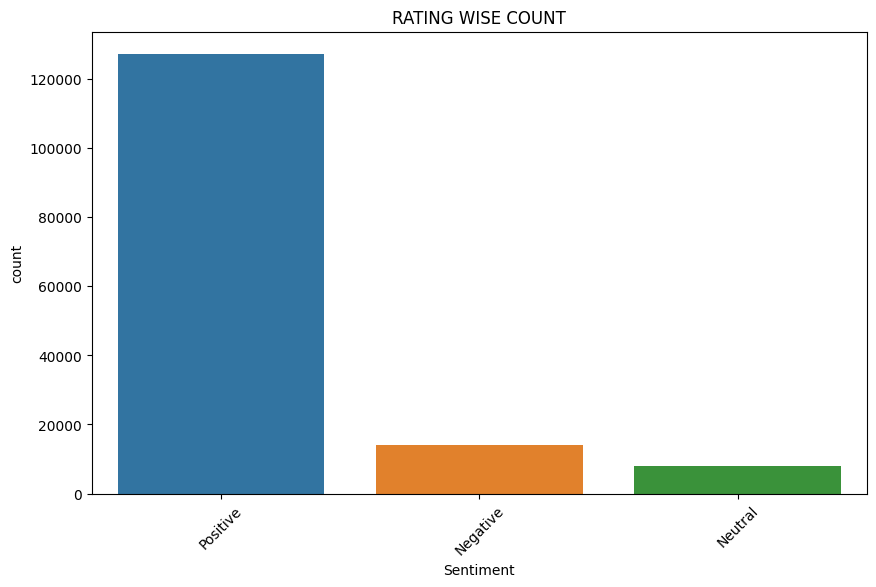

In [199]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df_merged, x='Sentiment')
plt.xticks(rotation=45)
plt.title('RATING WISE COUNT')
plt.show()

In [200]:
df_merged.dtypes

overall             int64
verified             bool
reviewTime         object
reviewerID         object
asin               object
reviewerName       object
reviewText         object
summary            object
unixReviewTime      int64
category           object
tech1              object
description        object
fit               float64
title              object
also_buy           object
tech2             float64
brand              object
feature            object
rank               object
also_view          object
main_cat           object
similar_item       object
date               object
price              object
new_reviewtext     object
Sentiment          object
neg               float64
neu               float64
pos               float64
compound          float64
Category1          object
sub category       object
items              object
Time               object
Year               object
dtype: object

In [201]:

from datetime import datetime
df_merged['reviewTime'] = pd.to_datetime(df_merged['reviewTime'], format="%m %d, %Y").dt.strftime("%Y-%m-%d")

In [202]:
df_merged.head()

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,category,...,Sentiment,neg,neu,pos,compound,Category1,sub category,items,Time,Year
0,5,True,2013-06-04,ALP49FBWT4I7V,1888861614,Lori,Very pleased with my purchase. Looks exactly l...,Love it,1370304000,"['Grocery & Gourmet Food', 'Cooking & Baking',...",...,Positive,0.0,0.286,0.714,0.9325,Grocery & Gourmet Food,Cooking & Baking,"Frosting, Icing & Decorations, Cake & Cupcake...",06 4,2013
1,4,True,2014-05-23,A1KPIZOCLB9FZ8,1888861614,BK Shopper,Very nicely crafted but too small. Am going to...,Nice but small,1400803200,"['Grocery & Gourmet Food', 'Cooking & Baking',...",...,Positive,0.0,0.734,0.266,0.4404,Grocery & Gourmet Food,Cooking & Baking,"Frosting, Icing & Decorations, Cake & Cupcake...",05 23,2014
2,4,True,2014-05-09,A2W0FA06IYAYQE,1888861614,daninethequeen,still very pretty and well made...i am super p...,"the ""s"" looks like a 5, kina",1399593600,"['Grocery & Gourmet Food', 'Cooking & Baking',...",...,Positive,0.0,0.316,0.684,0.9001,Grocery & Gourmet Food,Cooking & Baking,"Frosting, Icing & Decorations, Cake & Cupcake...",05 9,2014
3,5,True,2014-04-20,A2PTZTCH2QUYBC,1888861614,Tammara,"I got this for our wedding cake, and it was ev...",Would recommend this to a friend!,1397952000,"['Grocery & Gourmet Food', 'Cooking & Baking',...",...,Positive,0.0,0.762,0.238,0.3612,Grocery & Gourmet Food,Cooking & Baking,"Frosting, Icing & Decorations, Cake & Cupcake...",04 20,2014
4,4,True,2014-04-16,A2VNHGJ59N4Z90,1888861614,LaQuinta Alexander,It was just what I want to put at the top of m...,Topper,1397606400,"['Grocery & Gourmet Food', 'Cooking & Baking',...",...,Positive,0.0,0.284,0.716,0.8442,Grocery & Gourmet Food,Cooking & Baking,"Frosting, Icing & Decorations, Cake & Cupcake...",04 16,2014


In [203]:
# Time series

In [204]:
# to ignore the warnings
import warnings
warnings.filterwarnings('ignore')

In [205]:
rating_time_df=df_merged[['reviewTime','overall']]   # selecting the necessary columns for the timeseries analysis and saving it in new variable
rating_time_df.head()        # reading the final dataframe

,reviewTime,overall
0,2013-06-04,5
1,2014-05-23,4
2,2014-05-09,4
3,2014-04-20,5
4,2014-04-16,4


In [206]:
df_merged["reviewTime"] = pd.to_datetime(df_merged["reviewTime"])

In [207]:
rating_time_df=df_merged[['reviewTime','overall']]   # selecting the necessary columns for the timeseries analysis and saving it in new variable
rating_time_df.head()        # reading the final dataframe

,reviewTime,overall
0,2013-06-04,5
1,2014-05-23,4
2,2014-05-09,4
3,2014-04-20,5
4,2014-04-16,4


In [208]:
# Convert reviewTime to datetime format and set it as the index
rating_time_df['reviewTime'] = pd.to_datetime(rating_time_df['reviewTime'], format='%d-%m-%Y')
rating_time_df.set_index('reviewTime', inplace=True)

In [209]:
# sorting the data in ascending basis on reviewTime
rating_time_df=rating_time_df[['overall']]
rating_time_df=rating_time_df.sort_values(by='reviewTime')

In [210]:
rating_time_df    # reading the proper dataframe which is used for the time series analysis

,overall
reviewTime,
2000-08-09,5
2000-08-09,5
2000-12-05,5
2000-12-05,5
2001-07-05,5
...,...
2018-05-15,4
2018-05-15,5
2018-05-15,5


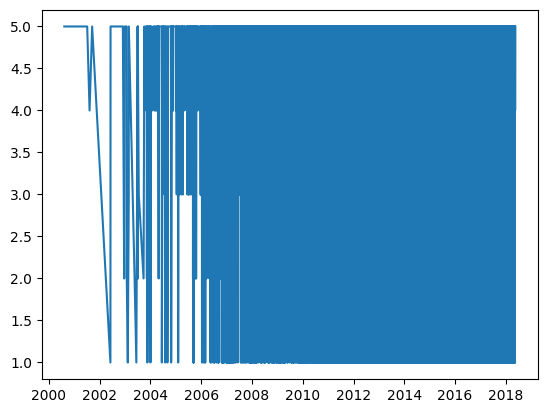

In [211]:
plt.plot(rating_time_df)     # plotting the data

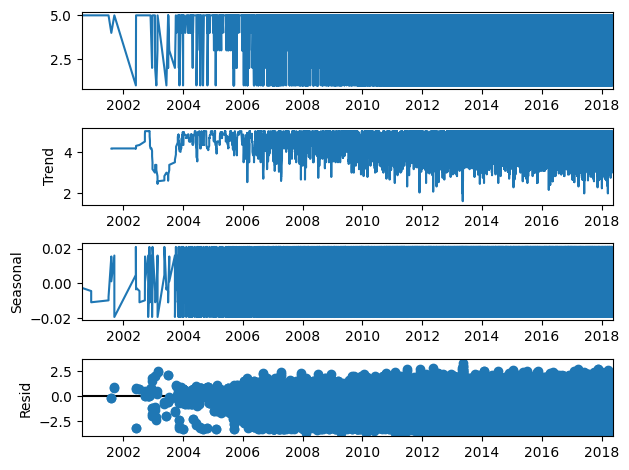

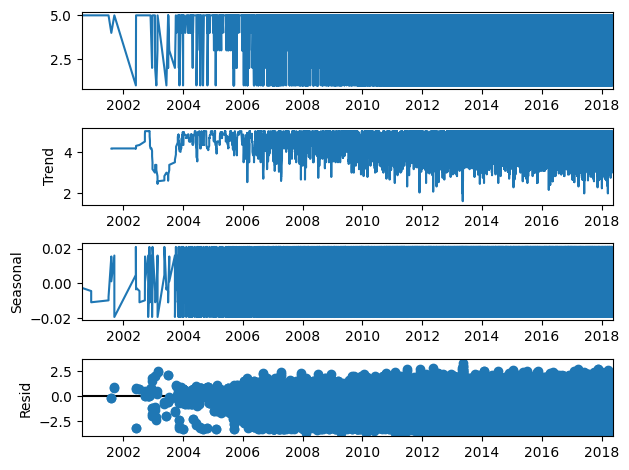

In [212]:
# importing seasonal_decompose to perform a seasonal decomposition on a time series dataset.
# help to identify patterns or trends,seasonality,cyclic,noise in the data
from statsmodels.tsa.seasonal import seasonal_decompose

# period of 12, which suggests that the time series data has a seasonal component that repeats every 12 time periods (Months)
seasonal_decompose(rating_time_df,period=12).plot()  # "plot" function is then called to display the decomposition graphically

In [213]:
#As we can see we cant conclude that components exist or not in the data as the plot is not clear so here we apply the resample

In [214]:
# Resample the data to monthly frequency which reduced the data and shows the data monthly with last date
monthly_data = rating_time_df.resample('M').mean() # The resulting "monthly_data" DataFrame contains the mean ratings for each month in the original time series dataset
monthly_data

,overall
reviewTime,
2000-08-31,5.000000
2000-09-30,NaN
2000-10-31,NaN
2000-11-30,NaN
2000-12-31,5.000000
...,...
2018-01-31,4.346810
2018-02-28,4.271498
2018-03-31,4.316609


In [215]:
monthly_data.isnull().sum()# checking nan value

overall    22
dtype: int64

In [216]:
monthly_data['overall']= monthly_data['overall'].fillna(monthly_data['overall'].mean())

In [217]:
monthly_data.isnull().sum()

overall    0
dtype: int64

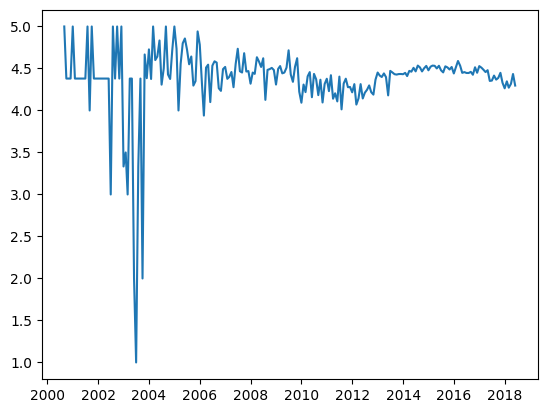

In [218]:
# after resampling the data to monthly the plot represents the data
plt.plot(monthly_data)

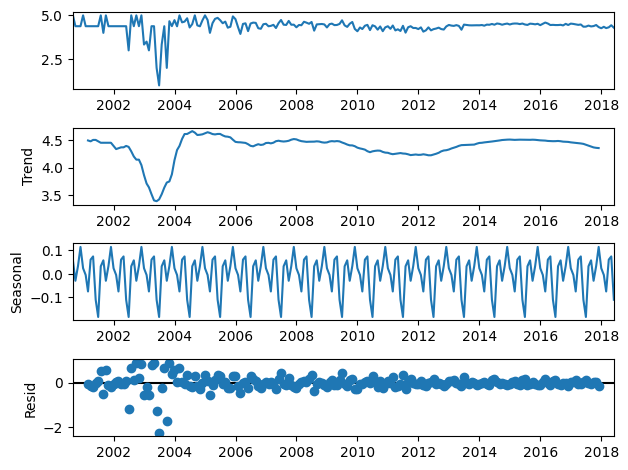

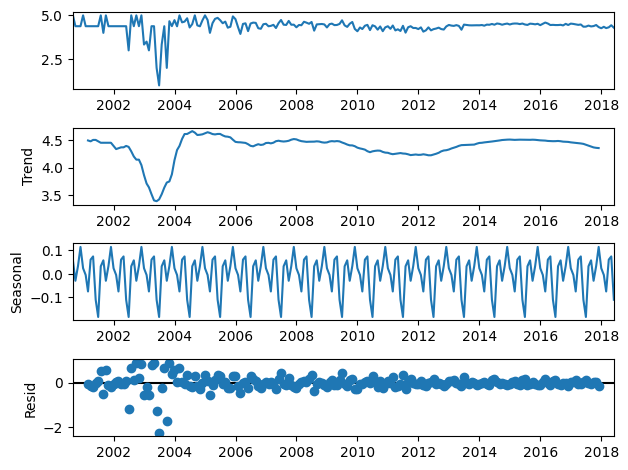

In [219]:
seasonal_decompose(monthly_data,period=12).plot()

In [220]:
# checking monthly_data is stationary or not

# used to perform an Augmented Dickey-Fuller test on a time series to test for stationarity.
from statsmodels.tsa.stattools import adfuller
# function  "checkstationary" that takes a DataFrame of monthly time series data as its input
def checkstationary(monthly_data):
    # The output of the ADF test is a tuple containing several values, including the test statistic and the p-value.
    # In this line of code, the "[1]" index is used to extract only the p-value from the ADF test result
    pvalue=adfuller(monthly_data)[1]
    print(pvalue)
    if pvalue<0.05:
        msg='pvalue={}. Data is stationary.proceed to model building '.format(pvalue)
    else:
        msg='pvalue={}. Data is not stationary.make the data statinoary and proceed to model building '.format(pvalue)

    return msg

In [221]:
print(checkstationary(monthly_data))     # calling function and giving the dataframe as input to check the stationarity

0.013671165404193176
pvalue=0.013671165404193176. Data is stationary.proceed to model building 


In [222]:
#As we see that now the data is stationary so we can perform the ARIMA and SARIMA model
# These plots can be used to help identify the appropriate lag order for an autoregressive (AR) or moving average (MA) model.

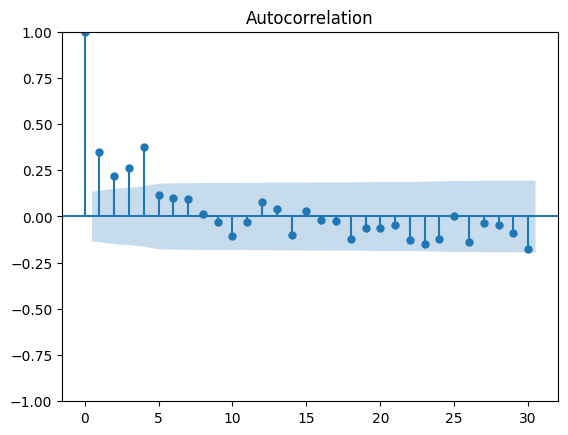

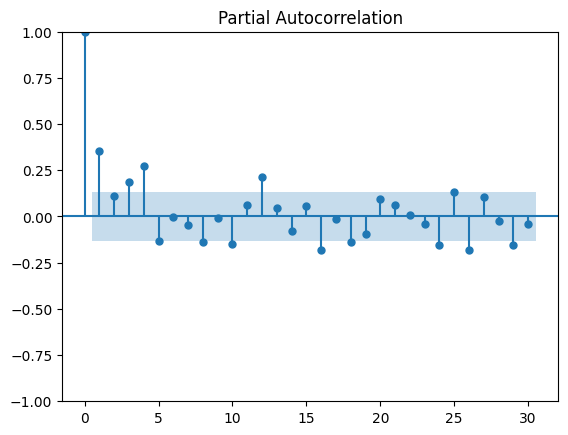

In [223]:
# "plot_acf" and "plot_pacf" functions from the "statsmodels.graphics.tsaplots" module to plot the autocorrelation function (ACF) and partial autocorrelation function (PACF) of the "diff_overall" time series data.
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
# The ACF plot shows the correlation between the values of the time series at different lags
plot_acf(monthly_data,lags=30);
# The PACF it shows the direct correlation between the values at each lag, without the influence of any other lags.
plot_pacf(monthly_data,lags=30);

In [224]:
#  we Got q=5 and p=13 and d=0

In [225]:
for p in range(14):
    for q in range(6):
        model= ARIMA(monthly_data, order=(p,0,q))
        selection = model.fit()
        print("p is",p,"q is",q,"AIC is",selection.aic)

p is 0 q is 0 AIC is 244.92014759025676
p is 0 q is 1 AIC is 224.51889642964585
p is 0 q is 2 AIC is 222.7870824790399
p is 0 q is 3 AIC is 224.2612626483982
p is 0 q is 4 AIC is 195.41071966272636
p is 0 q is 5 AIC is 194.1755607659687
p is 1 q is 0 AIC is 218.6764178950249
p is 1 q is 1 AIC is 210.39186018308123
p is 1 q is 2 AIC is 212.16930394260314
p is 1 q is 3 AIC is 208.33467326010336
p is 1 q is 4 AIC is 188.43747896901363
p is 1 q is 5 AIC is 189.86630083454065
p is 2 q is 0 AIC is 218.18187331863015
p is 2 q is 1 AIC is 212.26296826403595
p is 2 q is 2 AIC is 213.7739334869746
p is 2 q is 3 AIC is 195.875436740558
p is 2 q is 4 AIC is 189.59028471260677
p is 2 q is 5 AIC is 191.5813201506038
p is 3 q is 0 AIC is 213.01306459028064
p is 3 q is 1 AIC is 209.30372562486082
p is 3 q is 2 AIC is 195.13860278326445
p is 3 q is 3 AIC is 194.62974763440232
p is 3 q is 4 AIC is 191.07657196776145
p is 3 q is 5 AIC is 184.8912620084129
p is 4 q is 0 AIC is 199.4167534174153
p is 4 q i

In [226]:
# p is 7 q is 4 AIC is 178.4564818439663  lowest aic score

In [227]:
# splitting the monthly_data time series data into training and testing data using a 80-20 split.
# The first 80% of the data is assigned to the train_data variable, and the remaining 20% is assigned to the test_data variable
train_data, test_data = monthly_data[0:int(len(monthly_data)*0.8)], monthly_data[int(len(monthly_data)*0.8):]

In [228]:
monthly_data.head()

,overall
reviewTime,
2000-08-31,5.000000
2000-09-30,4.380014
2000-10-31,4.380014
2000-11-30,4.380014
2000-12-31,5.000000


In [229]:
test_data.shape

(43, 1)

In [230]:

train_data.shape

(171, 1)

In [231]:
#  Build the SARIMA model.
from statsmodels.tsa.statespace.sarimax import SARIMAX
p=7;d=0;q=4;
P=7;D=1;Q=4;
sarima_model = SARIMAX(train_data, order=(p,d,q), seasonal_order=(P,D,Q,12)) # 12 is seasonal period  (i.e., monthly data).
sarima_model_fit = sarima_model.fit()
# now the sarima_model_fit variable contains various statistics and diagnostic information about the model, such as the estimate

In [233]:
# Step 1: Make predictions on the test data
predictions = sarima_model_fit.predict(start = len(train_data), end = len(train_data) + len(test_data)-1, dynamic=False)

# Step 2: Compare the predicted values with the actual values
actual = test_data['overall']
predicted = predictions

# Step 3: Calculate MSE and RMSE
from sklearn.metrics import mean_squared_error
from math import sqrt

mse = mean_squared_error(actual, predicted)
rmse = sqrt(mse)

print("MSE:", mse)
print("RMSE:", rmse)

MSE: 0.029182548413233988
RMSE: 0.17082900343101573


In [234]:
# creating an dataframe with actual and predicted to compare the results
compare=pd.DataFrame({"Actual":actual,"Predicted":predicted})
compare

,Actual,Predicted
2014-11-30,4.530603,4.421294
2014-12-31,4.478465,4.491299
2015-01-31,4.521526,4.301022
2015-02-28,4.534227,4.278471
2015-03-31,4.531719,4.476949
2015-04-30,4.500390,4.483829
2015-05-31,4.532148,4.340248
2015-06-30,4.478315,4.130944
2015-07-31,4.453409,4.537496
2015-08-31,4.525510,4.544716


In [235]:
actual1= 2.5 * actual + 3
predicted1=2.5 * predicted + 3

In [236]:

# Set the number of time periods to forecast
n_periods = 48

# Make the forecast
forecast = sarima_model_fit.forecast(len(actual)+n_periods)

# Print the forecasted values
forecast.tail()

2022-01-31    4.358625
2022-02-28    4.256065
2022-03-31    4.433462
2022-04-30    4.468549
2022-05-31    4.251669
Freq: M, Name: predicted_mean, dtype: float64

In [237]:
forecast1=2.5 * forecast + 3

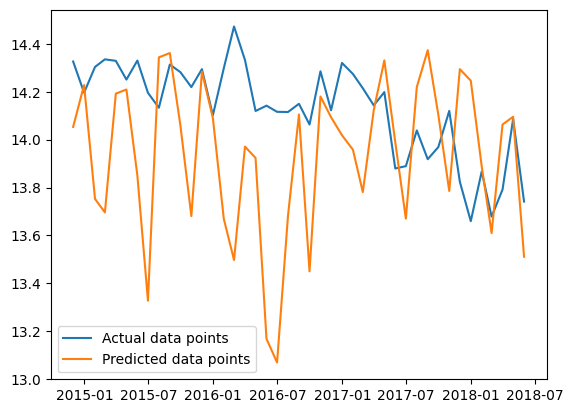

In [238]:

# displaying the Actual vs predicted

plt.plot(actual1,label='Actual data points')
plt.plot(predicted1,label='Predicted data points')
plt.legend()
plt.show()

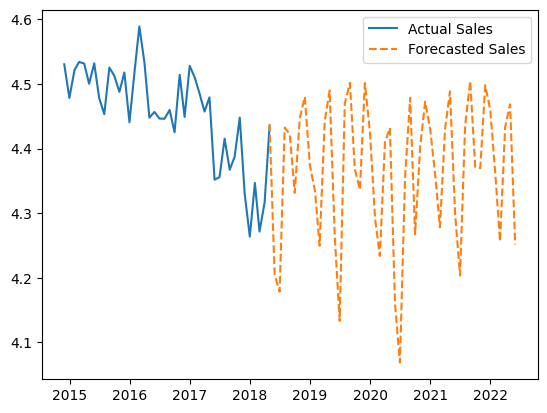

In [239]:

n_forecast = 48
start_date = '2018-04-30'

plt.plot(test_data[:'2018-04-30'], label='Actual Sales')
plt.plot(forecast[start_date:], label='Forecasted Sales', linestyle='--')
plt.legend()
plt.show()

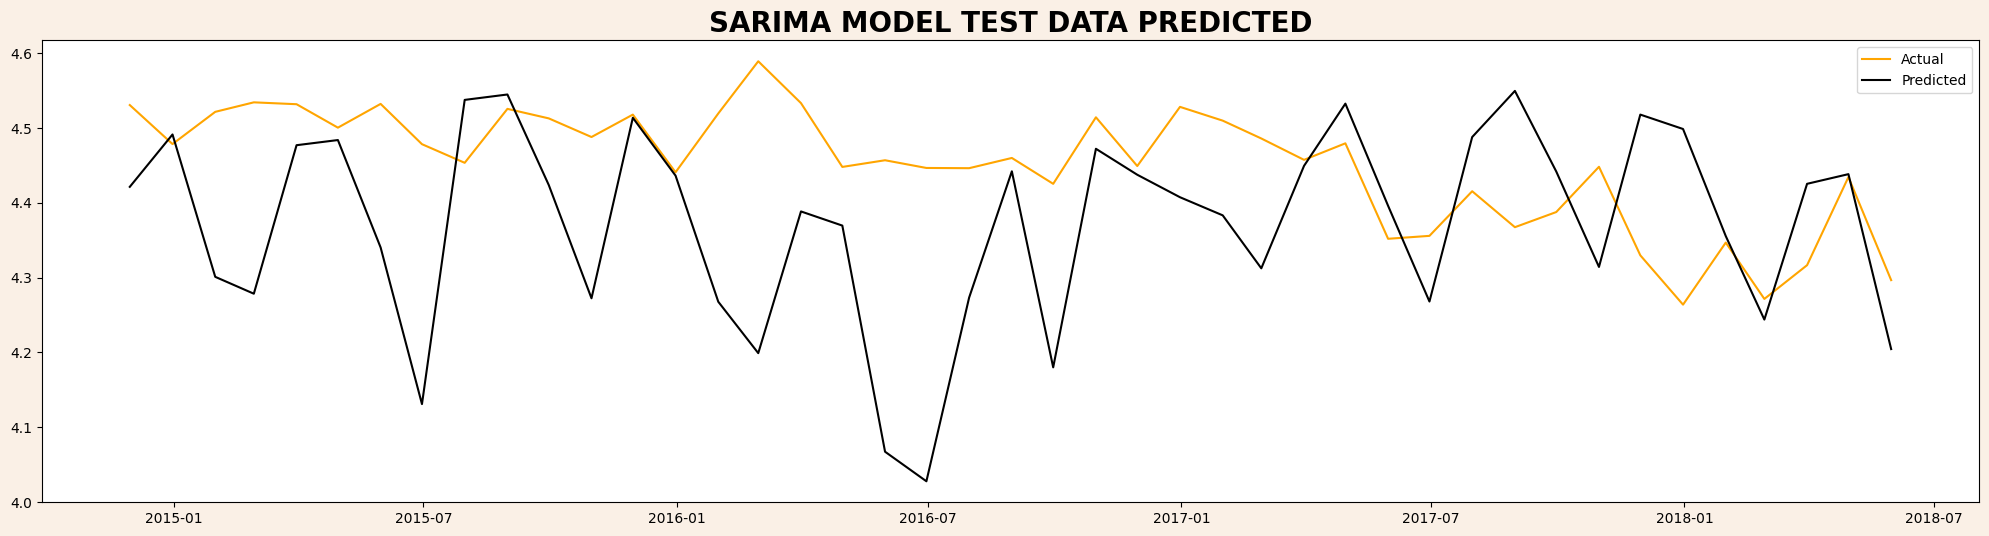

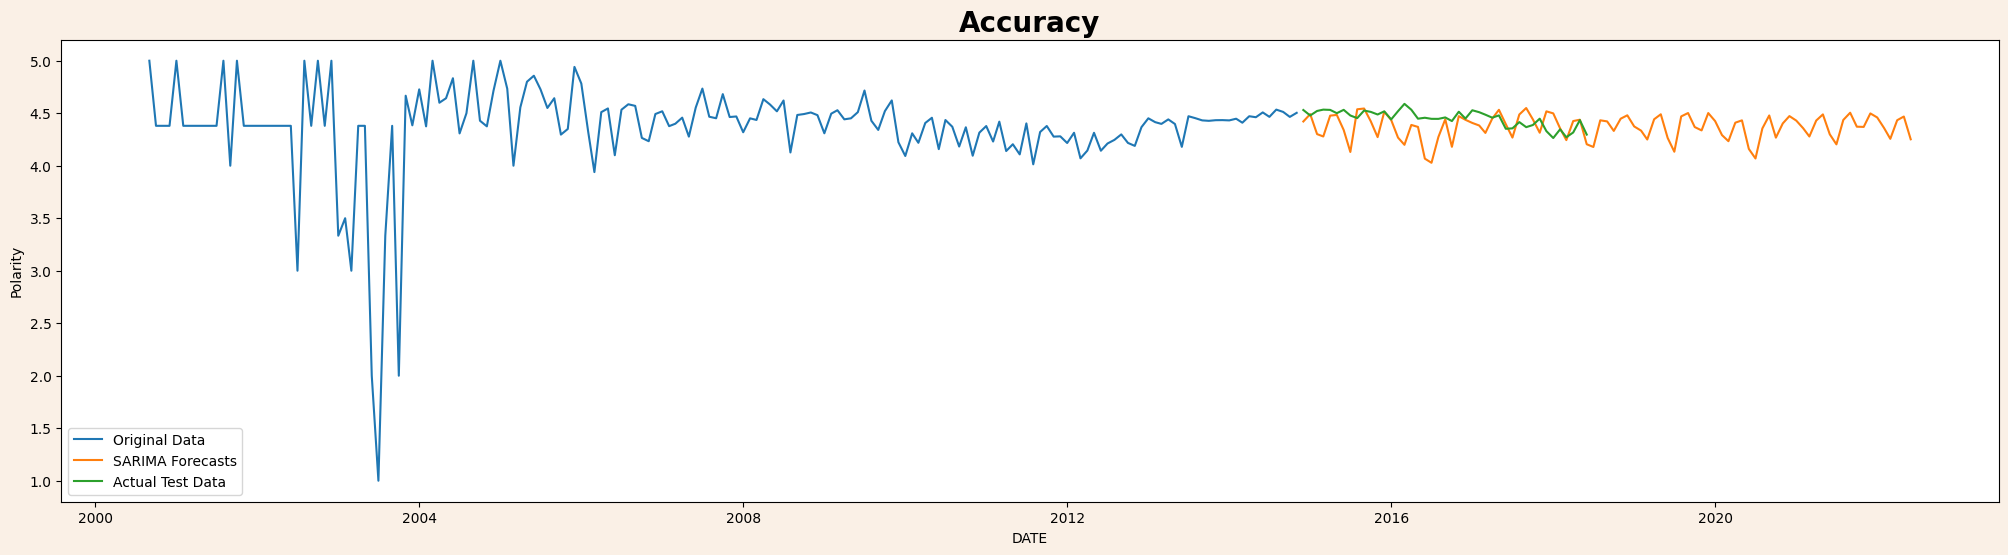

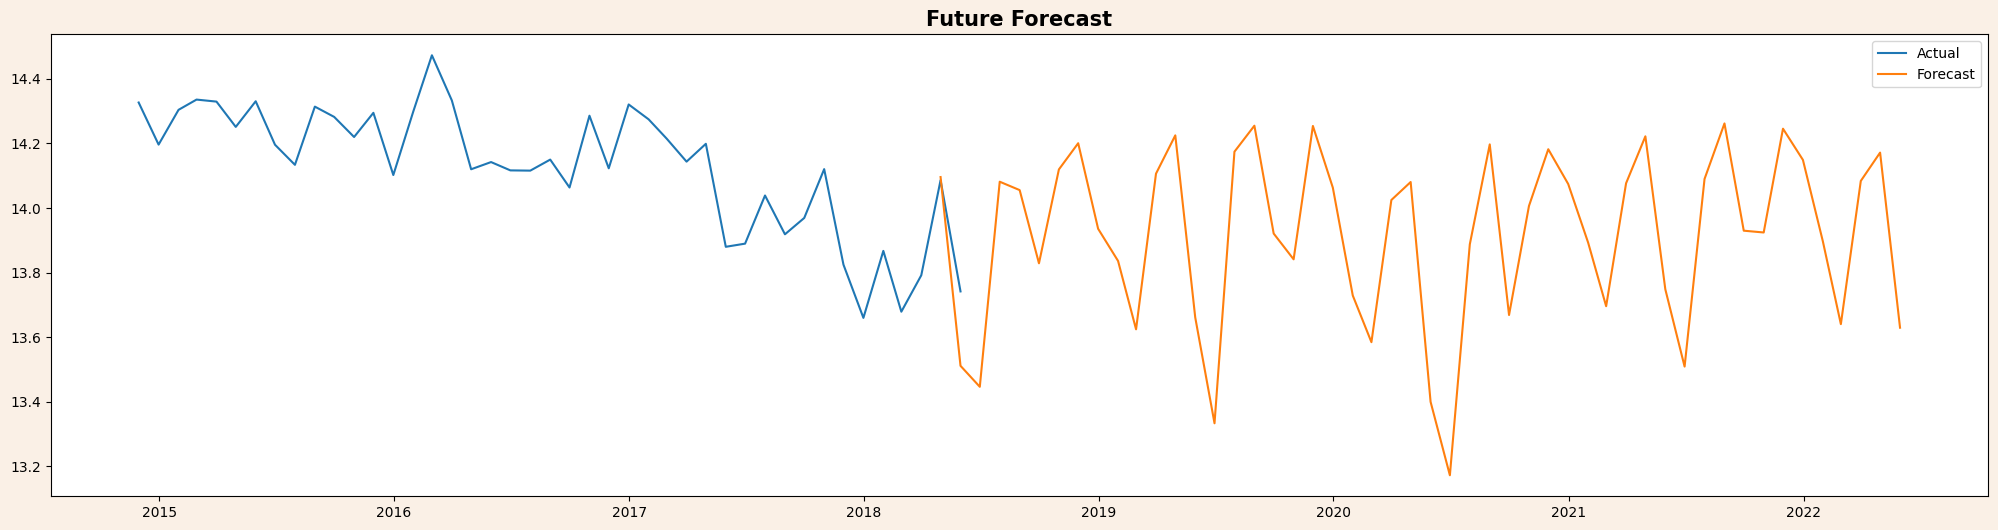

In [240]:
# displaying the predicted and actual
# accuracy which means - forecast,predicted and actual
# displaying the forecast and actuall

plt.subplots(figsize=(25,6),facecolor ='linen')
plt.subplot(1, 1, 1)  # row 1, column 2, count 1
plt.title(f'SARIMA MODEL TEST DATA PREDICTED', fontweight='bold', size=20)
plt.plot(test_data, c='orange',label="Actual")
plt.plot(predicted, c='black',label='Predicted')
plt.legend()
plt.show()


plt.subplots(figsize=(25,6),facecolor ='linen')
#plt.subplot(2, 1, 1)
plt.title(f'Accuracy', fontweight='bold', size=20)
plt.plot(train_data, label='Original Data')
plt.plot(forecast, label='SARIMA Forecasts')
plt.plot(test_data, label='Actual Test Data')
plt.xlabel("DATE")
plt.ylabel('Polarity')
plt.legend()
plt.show()

plt.subplots(figsize=(25,6),facecolor ='linen')
#plt.subplot(3, 1, 1)
plt.title('Future Forecast', fontweight='bold',size=15)
plt.plot(actual1, label = 'Actual')
plt.plot(forecast1['2018-04-30':], label = 'Forecast')
plt.legend()
plt.show()